In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("assi_index.csv")
df['date'] = pd.to_datetime(df['date'])

df = df.dropna(subset=['ASSI'])

df['ASSI'].isna().sum()

np.int64(0)

In [ ]:
df = df.sort_values(['state','district','date'])

In [ ]:
features = ['age_weighted_load','growth_rate','volatility','anomaly']

X = df[features]

y = df['ASSI']

In [ ]:
split_date = df['date'].quantile(0.8)

train = df[df['date'] <= split_date]
test  = df[df['date'] > split_date]

X_train = train[['age_weighted_load','growth_rate','volatility','anomaly']]
y_train = train['ASSI']

X_test = test[['age_weighted_load','growth_rate','volatility','anomaly']]
y_test = test['ASSI']


In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

mae, r2


(0.06156894556340441, 0.9967079063066238)

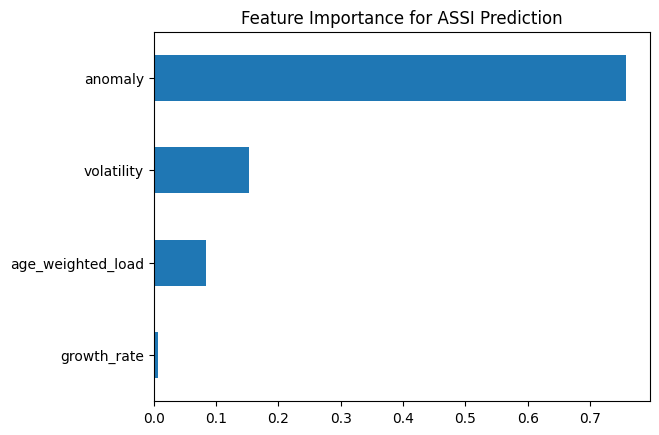

In [ ]:
import matplotlib.pyplot as plt

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values()

importance.plot(kind='barh')
plt.title("Feature Importance for ASSI Prediction")
plt.show()


In [ ]:
df['predicted_ASSI'] = model.predict(X)

In [ ]:
future_risk = df[df['predicted_ASSI'] > 60]

future_risk[['state','district','date','predicted_ASSI']].sort_values(
    by='predicted_ASSI', ascending=False
).head(10)


,state,district,date,predicted_ASSI
1772,Karnataka,Bengaluru Urban,2025-07-31,71.171907
1771,Karnataka,Bengaluru Urban,2025-06-30,68.801314
682,Bihar,Pashchim Champaran,2025-06-30,61.261691


In [ ]:
df.to_csv("assi_predictions.csv", index=False)


In [ ]:
data = pd.read_csv("assi_predictions.csv")
data.head()

,state,district,date,total_enrolments,age_weighted_load,growth_rate,volatility,anomaly,ASSI,stress_level,predicted_ASSI
0,Andaman & Nicobar Islands,Andamans,2025-09-30,6.0,0.000485,0.013675,0.000472,0.0,0.370715,Low,0.370211
1,Andaman & Nicobar Islands,Andamans,2025-10-31,6.0,0.000499,0.013675,0.000472,0.0,0.371270,Low,0.370928
2,Andaman & Nicobar Islands,Andamans,2025-11-30,1.0,0.000083,0.002269,0.000472,0.0,0.069496,Low,0.070602
3,Andaman & Nicobar Islands,South Andaman,2025-09-30,8.0,0.000665,0.013675,0.000694,0.0,0.382355,Low,0.382454
4,Andaman & Nicobar Islands,South Andaman,2025-10-31,2.0,0.000166,0.003410,0.000694,0.0,0.105769,Low,0.105408
